In [1]:
import os
import sys
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [5]:
!{sys.executable} -m pip install glob2

In [6]:
!{sys.executable} -m pip install opencv-python

In [3]:
!{sys.executable} -m pip install labelImg

  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261542 sha256=240179a527fde32257e1b18e90ed0c83de57c9588993dcefd570ee0f02573da1
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a0\2d\29\aaf47d232f5b03ec3e64a8432032f328dfdea1714041712bf6
Successfully built labelImg


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, but you have pyqt5 5.15.9 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import random

In [8]:
! cd

c:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Image preprocessor


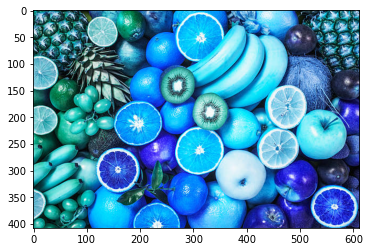

In [9]:
path = r'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Images/Images/Cracked/Raw/FRUITS.jpg'
img = cv2.imread(path, cv2.IMREAD_COLOR)
img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.GaussianBlur(img, (7, 7), 0)
img3 = cv2.resize(img, (1050, 1610)) #Resize to defined dimensions.

#Resizing_shrinking
(height, width) = img.shape[:2]
img4 = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation = cv2.INTER_CUBIC)


#Resizing_stretching
img5 = cv2.resize(img, (780, 540),
               interpolation = cv2.INTER_LINEAR)
plt.imshow(img)

M = cv2.getRotationMatrix2D((height / 2, width / 2), 30, 1)
img6 = cv2.warpAffine(img, M, (height, width))


M1 = np.float32([[1, 0, 100], [0, 1, 50]])
img7 = cv2.warpAffine(img, M1, (height, width))


# Using cv2.copyMakeBorder() method
img7= cv2.copyMakeBorder(img, 12, 12, 12, 12, cv2.BORDER_CONSTANT, None, value = 0)

#simple threshholding
ret, img8 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

#Hostogram equalization threshholding
img9= cv2.equalizeHist(img1)

#Otsu threshholding
ret, img10 = cv2.threshold(img1, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)

# denoising of image saving it into dst image
img11 = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 25)

#Flipping an image
img12 = cv2.flip(img, np.random.randint(0,1))

cv2.waitKey(0)
cv2.destroyAllWindows()
#hold the window
#plt.waitforbuttonpress(0)
#plt.close('all')

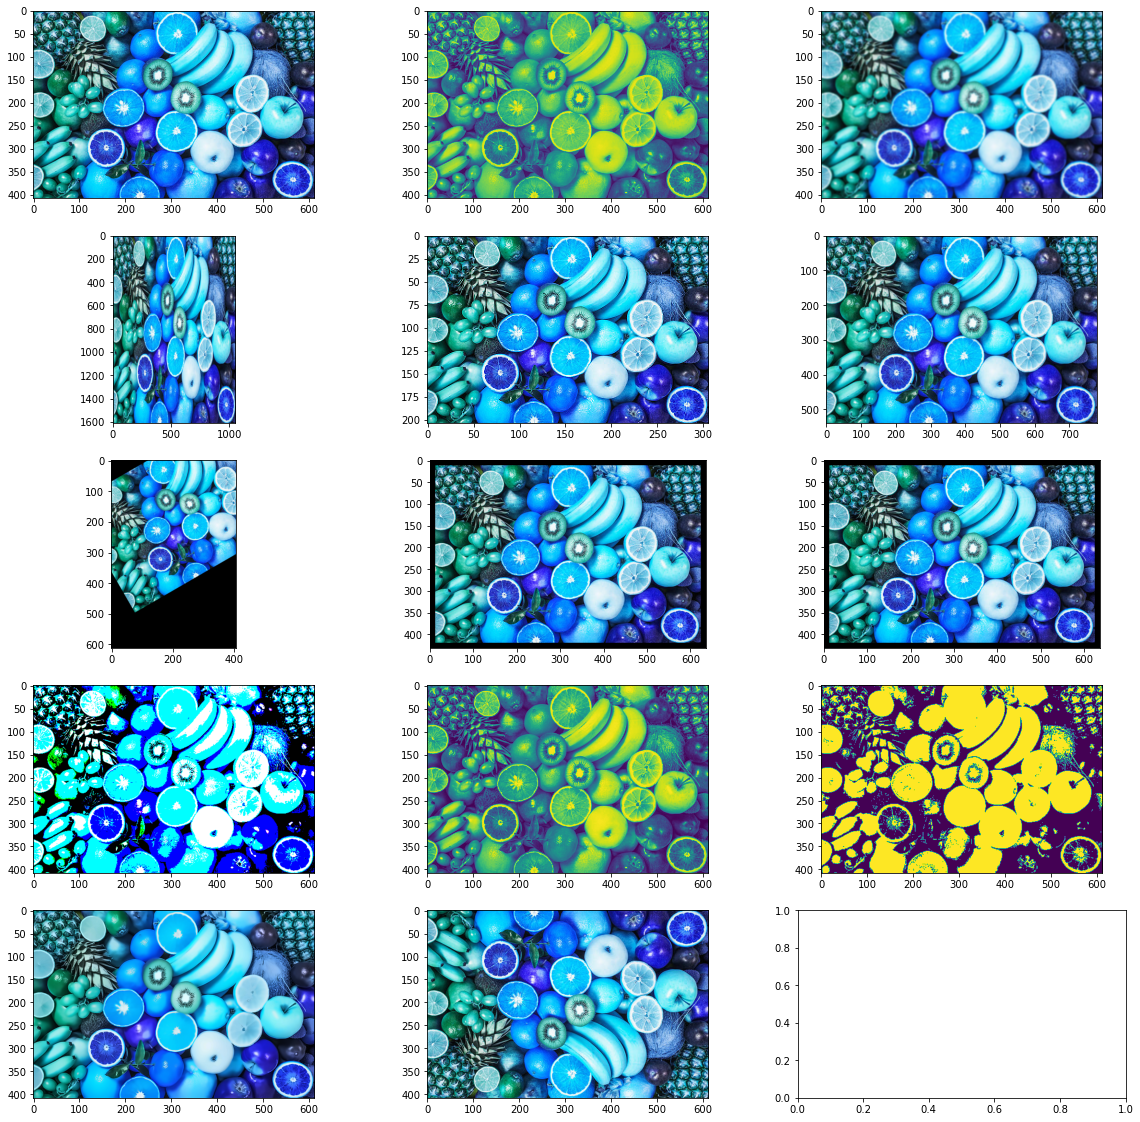

In [10]:
f, ax = plt.subplots(5,3, figsize=(20,20))

ax[0,0].imshow(img)
ax[0,1].imshow(img1)
ax[0,2].imshow(img2)
ax[1,0].imshow(img3)
ax[1,1].imshow(img4)
ax[1,2].imshow(img5)
ax[2,0].imshow(img6)
ax[2,1].imshow(img7)
ax[2,2].imshow(img7)
ax[3,0].imshow(img8)
ax[3,1].imshow(img9)
ax[3,2].imshow(img10)
ax[4,0].imshow(img11)
ax[4,1].imshow(img12)
plt.show()

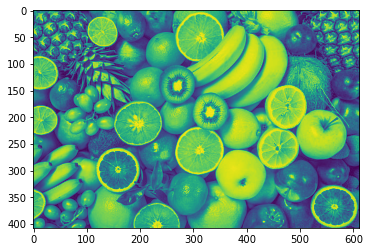

In [11]:
plt.imshow(img1)
plt.show()

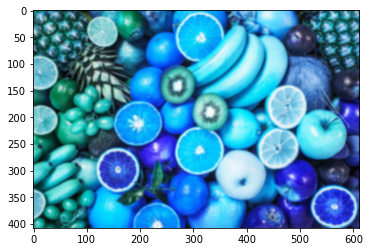

In [12]:
plt.imshow(img2)
plt.show()

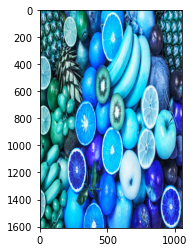

In [13]:
plt.imshow(img3)
plt.show()

In [14]:
print(img.shape)
print(img1.shape)
print(img2.shape)
print(img3.shape)
print(img4.shape)

(408, 612, 3)
(408, 612)
(408, 612, 3)
(1610, 1050, 3)
(204, 306, 3)


In [15]:
directory = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Images'
os.chdir(directory)

print("Before saving image:")  
print(os.listdir(directory)) 

filename = 'TrialsavedImage1.jpg'
filename1 = 'TrialsavedImage2.jpg'
filename2 = 'TrialsavedImage3.jpg'
filename3 = 'TrialsavedImage3.jpg'
filename4 = 'TrialsavedImage4.jpg'
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, img)
cv2.imwrite(filename1, img1)
cv2.imwrite(filename2, img2)
cv2.imwrite(filename3, img3)
cv2.imwrite(filename4, img4)

# List files and directories  
# in 'C:/Users / HP / Desktop / IT.....'  
print("After saving image:")  
print(os.listdir(directory))
  
print('Successfully saved')

Before saving image:
['Images', 'TrialsavedImage.jpg', 'TrialsavedImage1.jpg', 'TrialsavedImage2.jpg', 'TrialsavedImage3.jpg', 'TrialsavedImage4.jpg']
After saving image:
['Images', 'TrialsavedImage.jpg', 'TrialsavedImage1.jpg', 'TrialsavedImage2.jpg', 'TrialsavedImage3.jpg', 'TrialsavedImage4.jpg']
Successfully saved


In [30]:

def ImageProcessor(origin, destination):
    origin_list =  glob.glob(origin)
    #glob.iglob(origin) #List of files/images
    desination_dir = glob.glob(destination) #Destination list 

    Serial_no = 0
    for image in origin_list:
        
        Serial_no = random.randint(0,300) # helps to randomize images before annotation
        #Read raw image in color format
        raw_image = cv2.imread(image, cv2.IMREAD_COLOR)

        #Convert to grayscale and write to destination file
        image_grey = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Grey_scale_.jpg'), image_grey)

        #Introduce gaussian blur
        Serial_no = random.randint(0,300)
        image_Gaussian = cv2.GaussianBlur(raw_image, (7,7), 0)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Gaussian_Image.jpg'), image_Gaussian)


        #resize of raw images
        Serial_no = random.randint(0,300)
        imageResize = cv2.resize(raw_image, (640, 640)) #Resize to defined dimensions.
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Resized_Image.jpg'), imageResize)


        #Resizing_shrinking of raw_image
        Serial_no = random.randint(0,300)
        (height, width) = raw_image.shape[:2]
        image_shrink = cv2.resize(raw_image, (int(width / 2), int(height / 2)), interpolation = cv2.INTER_CUBIC)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Shrinked_Image.jpg'), image_shrink)


        #Resizing by stretching raw image
        Serial_no = random.randint(0,300)
        Image_stretch = cv2.resize(raw_image, (random.randint(500,1000), random.randint(500,1000)),interpolation = cv2.INTER_LINEAR)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Stretched_Image.jpg'), Image_stretch)

        #Rotation of raw image
        Serial_no = random.randint(0,300)
        M = cv2.getRotationMatrix2D((height / 2, width / 2), random.randint(30,90), 1)
        image_rotation = cv2.warpAffine(raw_image, M, (height, width))
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Rotated_Image.jpg'), image_rotation)

        #Shifting of images
        Serial_no = random.randint(0,300)
        M1 = np.float32([[1, 0, random.randint(75,100)], [0, 1, random.randint(25,50)]])
        image_shift = cv2.warpAffine(raw_image, M1, (height, width))
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Shifted_Image.jpg'), image_shift)


        # Using cv2.copyMakeBorder() method
        Serial_no = random.randint(0,300)
        image_border= cv2.copyMakeBorder(raw_image, random.randint(1,15), random.randint(1,15), random.randint(1,15),
                                        random.randint(1,15), cv2.BORDER_CONSTANT, None, value = 0)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Bordered_Image.jpg'), image_border)


        #simple threshholding
        Serial_no = random.randint(0,300)
        ret, Binary_image_thresh = cv2.threshold(raw_image, 120, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Binary_theshhold_Image.jpg'), Binary_image_thresh)

        #Hostogram equalization threshholding
        Serial_no = random.randint(0,300)
        image_histEq= cv2.equalizeHist(image_grey)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_hist_Equalized_theshhold_Image.jpg'), image_histEq)


        #Otsu threshholding
        Serial_no = random.randint(0,300)
        ret, image_Otsu_Thresh = cv2.threshold(image_grey, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Otsu_theshhold_Image.jpg'), image_Otsu_Thresh)


        # denoising of image saving it into dst image
        Serial_no = random.randint(0,300)
        image_denoise = cv2.fastNlMeansDenoisingColored(raw_image, None, 10, 10, 7, 25)
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Denoised_Image.jpg'), image_denoise)

        #Flipping raw image
        Serial_no = random.randint(0,300)
        image_flipped = cv2.flip(raw_image, np.random.randint(0,1))
        cv2.imwrite(os.path.join(destination , f'{Serial_no}_Flipped_Image.jpg'), image_flipped)

    return(print('Process complete'))


In [12]:
ORIGIN_ = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Images/Images/Cracked/Raw'
print(os.listdir(ORIGIN_)) 

['01_Cracked_Tr.jpg', '02_Cracked_Tr.jpg', '03_Cracked_Tr.jpg', '04_Cracked_Tr.jpg', '05_Cracked_Tr.jpg', '06_Cracked_Tr.jpg', '07_Cracked_Tr.jpg', '08_Cracked_Tr.jpg', '09_Cracked_Tr.jpg', '10_Cracked_Tr.jpg', '11_Cracked_Tr.jpg', '12_Cracked_Tr.jpg', '13_Cracked_Tr.jpg', '14_Cracked_Tr.jpg', '15_Cracked_Tr.jpg', '16_Cracked_Tr.jpg', '17_Cracked_Tr.jpg', '19_Cracked_Tr.jpg', '20_Cracked_Tr.jpg', '21_Cracked_Tr.jpg', '22_Cracked_Tr.jpg', '23_Cracked_Tr.jpg', '24_Cracked_Tr.jpg', '25_Cracked_Tr.jpg', '26_Cracked_Tr.jpg', '27_Cracked_Tr.jpg', '28_Cracked_Tr.jpg', '29_Cracked_Tr.jpg', '30_Cracked_Tr.jpg', '31_Cracked_Tr.jpg', '32_Cracked_Tr.jpg', '33_Cracked_Tr.jpg', '34_Cracked_Tr.jpg', '35_Cracked_Tr.jpg', '36_Cracked_Tr.jpg', '37_Cracked_Tr.jpg', '38_Cracked_Tr.jpg', '39_Cracked_Tr.jpg', '40_Cracked_Tr.jpg', '41_Cracked_Tr.jpg', '42_Cracked_Tr.jpg', '43_Cracked_Tr.jpg', '44_Cracked_Tr.jpg', '45_Cracked_Tr.jpg', '46_Cracked_Tr.jpg', '47_Cracked_Tr.jpg', '48_Cracked_Tr.jpg', '49_Cracked_

In [13]:
print(glob.iglob(ORIGIN_))

<generator object _iglob at 0x0000028759781270>


In [32]:
#trial for cracked
ORIGIN_ = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Images/Images/Cracked/Raw/*.*'
DESTINATION_ = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Images/Images/Cracked/Processed'

cracked = ImageProcessor(ORIGIN_, DESTINATION_)

Process complete


In [19]:
from pathlib import Path

In [42]:
DESTINATION_SORT = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Images/Images/Cracked/Processed_sort'
from pathlib import Path

def sortingImage_cracked(path):
    sorting_number = 0
    source_list =  Path(path)
    for file in source_list.iterdir():

        sorting_number +=1

        directory = file.parent
        extension = file.suffix

        old_name = file.stem

        new_name = f'ID_{sorting_number}_Cracked_Training{extension}'
        file.rename(Path(directory, new_name))
        print(file)


def sortingImage_crazing(path):
    sorting_number = 0
    source_list =  Path(path)
    for file in source_list.iterdir():

        sorting_number +=1

        directory = file.parent
        extension = file.suffix

        old_name = file.stem

        new_name = f'ID_{sorting_number}_Crazing_Training{extension}'
        file.rename(Path(directory, new_name))
        print(file)



def sortingImage_efflorescence(path):
    sorting_number = 0
    source_list =  Path(path)
    for file in source_list.iterdir():

        sorting_number +=1

        directory = file.parent
        extension = file.suffix

        old_name = file.stem

        new_name = f'ID_{sorting_number}_Efflorescent_Training{extension}'
        file.rename(Path(directory, new_name))
        print(file)


def sortingImage_honeycomb(path):
    sorting_number = 0
    source_list =  Path(path)
    for file in source_list.iterdir():

        sorting_number +=1

        directory = file.parent
        extension = file.suffix

        old_name = file.stem

        new_name = f'ID_{sorting_number}_HoneyComb_Training{extension}'
        file.rename(Path(directory, new_name))
        print(file)


def sortingImage_spall(path):
    sorting_number = 0
    source_list =  Path(path)
    for file in source_list.iterdir():

        sorting_number +=1

        directory = file.parent
        extension = file.suffix

        old_name = file.stem

        new_name = f'ID_{sorting_number}_Spalling_Training{extension}'
        file.rename(Path(directory, new_name))
        print(file)

#sortingImage(DESTINATION_SORT)

In [35]:
#Project Data
#Data preprocessing for cracked images
SOURCE_CRACKED= 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Cracked Concrete/Cracking/*.*'
DESTINATION_CRACKED ='C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Cracked Concrete - preprocessed'
cracked = ImageProcessor(SOURCE_CRACKED, DESTINATION_CRACKED)

Process complete


In [36]:
#Data preprocessing for crazing images
SOURCE_CRAZING= 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Crazing Concrete/Crazing/*.*'
DESTINATION_CRAZING ='C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Crazing Concrete - preprocessed'
crazing = ImageProcessor(SOURCE_CRAZING, DESTINATION_CRAZING)

Process complete


In [37]:
#Data preprocessing for efflorescence images
SOURCE_EFF= 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Efflorescence Concrete/Efflorescence/*.*'
DESTINATION_EFF ='C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Efflorescence Concrete - preprocessed'
Efflorescence = ImageProcessor(SOURCE_EFF, DESTINATION_EFF)

Process complete


In [38]:
#Data preprocessing for cracked images
SOURCE_HC= 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Honeycomb Concrete/Honeycombing/*.*'
DESTINATION_HC ='C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Honeycomb Concrete - preprocessed'
Honey_comb = ImageProcessor(SOURCE_HC, DESTINATION_HC)

Process complete


In [40]:
#Data preprocessing for cracked images
SOURCE_SPALLED= 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Spalled Concrete/Spalling/*.*'
DESTINATION_SPALLED ='C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Spalled Concrete - preprocessed'
cracked = ImageProcessor(SOURCE_SPALLED, DESTINATION_SPALLED)

Process complete


In [43]:
#Sorting the images

DESTINATION_CRACKED_SORT = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Cracked Concrete - preprocessed - sorted'
DESTINATION_CRAZING_SORT = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Crazing Concrete - preprocessed - sorted'
DESTINATION_EFF_SORT = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Efflorescence Concrete - preprocessed - sorted'
DESTINATION_HC_SORT = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Honeycomb Concrete - preprocessed - sorted'
DESTINATION_SPALLED_SORT = 'C:/Users/HP/Desktop/IT/Data science/JENGA/Fourth Module/Data/Raw images/Spalled Concrete - preprocessed - sorted'

sortingImage_cracked(DESTINATION_CRACKED_SORT)

sortingImage_crazing(DESTINATION_CRAZING_SORT)

sortingImage_efflorescence(DESTINATION_EFF_SORT)

sortingImage_honeycomb(DESTINATION_HC_SORT)

sortingImage_spall(DESTINATION_SPALLED_SORT)

C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\0_Binary_theshhold_Image.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\0_Bordered_Image.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\0_Denoised_Image.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\0_Gaussian_Image.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\0_Grey_scale_.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\100_Binary_theshhold_Image.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fourth Module\Data\Raw images\Cracked Concrete - preprocessed - sorted\100_Gaussian_Image.jpg
C:\Users\HP\Desktop\IT\Data science\JENGA\Fou